# Information

## CC_CC_4pts

This code uses:
+ Cleaner_Centroid with 4 points
+ Client_Centroid with 4 points
+ Then uses the centroids to compare distance between both centroids

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats  # For mode calculation

In [2]:
def detect_interactions(distances, min_consecutive=40, threshold=150):
    """
    Detect interactions in a sequence of distances.

    Parameters:
        distances (list or numpy array): A sequence of distances.
        min_consecutive (int): Minimum consecutive frames required for an interaction.
        threshold (float): Threshold value to determine an interaction.

    Returns:
        List of tuples where each tuple represents an interaction (start_frame, end_frame).
    """
    interactions = []
    current_start = None

    for i, distance in enumerate(distances):
        if distance < threshold:
            if current_start is None:
                current_start = i
        else:
            if current_start is not None:
                if i - current_start >= min_consecutive:
                    interactions.append((current_start, i - 1))
                current_start = None

    # Check if an interaction is ongoing at the end of the sequence
    if current_start is not None and len(distances) - current_start >= min_consecutive:
        interactions.append((current_start, len(distances) - 1))


    return interactions

In [3]:
directory = r"C:\Users\raulo\Desktop\ze_vids\phase_3\Tracks+Label_Top&Bot"
files = os.listdir(directory)

result_dataframes = {}

for file in files:
    df = pd.read_csv(os.path.join(directory, file))
    
    df["Behavior"].replace({"TS": "interaction", "jolts": "interaction"}, inplace=True)
    # Create a new DataFrame to store the results
    new_df = pd.DataFrame()

    # Add relevant data to the new DataFrame
    new_df["Behavior"] = df['Behavior']

    new_df['Client_Mouth_X_top'] = df['Client_Mouth']
    new_df['Client_Mouth_Y_top'] = df['Client_Mouth.1']
    new_df['Client_Mouth_Z_front']= df['Client_Mouth_Front.1']

    new_df['Client_S1_X_top'] = df['Client_Spine_1']
    new_df['Client_S1_Y_top'] = df['Client_Spine_1.1']
    new_df['Client_S1_Z_front']= df['Client_Spine_head_Front.1']

    new_df['Client_S2_X_top'] = df['Client_Spine_2']
    new_df['Client_S2_Y_top'] = df['Client_Spine_2.1']
    new_df['Client_S2_Z_front']= df['Client_Spine_mid_Front.1']

    new_df['Client_Tail_X_top'] = df['Client_Tail']
    new_df['Client_Tail_Y_top'] = df['Client_Tail.1']
    new_df['Client_Tail_Z_front']= df['Client_Tail_Front.1']

    new_df['Cleaner_Mouth_X_top'] = df['Cleaner_Mouth']
    new_df['Cleaner_Mouth_Y_top'] = df['Cleaner_Mouth.1']
    new_df['Cleaner_Mouth_Z_front']= df['Cleaner_Mouth_Front.1']

    new_df['Cleaner_Spine1_X_top'] = df['Cleaner_Spine1']
    new_df['Cleaner_Spine1_Y_top'] = df['Cleaner_Spine1.1']
    new_df['Cleaner_Spine1_Z_front']= df['Cleaner_Spine1_Front.1']

    new_df['Cleaner_Spine2_X_top'] = df['Cleaner_Spine2']
    new_df['Cleaner_Spine2_Y_top'] = df['Cleaner_Spine2.1']
    new_df['Cleaner_Spine2_Z_front']= df['Cleaner_Spine2_Front.1']

    new_df['Cleaner_Tail_X_top'] = df['Cleaner_Tail']
    new_df['Cleaner_Tail_Y_top'] = df['Cleaner_Tail.1']
    new_df['Cleaner_Tail_Z_front']= df['Cleaner_Tail_Front.1']

    new_df["Frame"] = df['Frame']
    
    # Create a new column in new_df to store the centroid for each row
    new_df['Client_Centroid_X'] = new_df[['Client_Mouth_X_top', 'Client_S1_X_top', 'Client_S2_X_top', 'Client_Tail_X_top']].mean(axis=1)
    new_df['Client_Centroid_Y'] = new_df[['Client_Mouth_Y_top', 'Client_S1_Y_top', 'Client_S2_Y_top', 'Client_Tail_Y_top']].mean(axis=1)
    new_df['Client_Centroid_Z'] = new_df[['Client_Mouth_Z_front', 'Client_S1_Z_front', 'Client_S2_Z_front', 'Client_Tail_Z_front']].mean(axis=1)
    
    # Create a new column in new_df to store the centroid for each row
    new_df['Cleaner_Centroid_X'] = new_df[['Cleaner_Mouth_X_top', 'Cleaner_Spine1_X_top', 'Cleaner_Spine2_X_top', 'Cleaner_Tail_X_top']].mean(axis=1)
    new_df['Cleaner_Centroid_Y'] = new_df[['Cleaner_Mouth_Y_top', 'Cleaner_Spine1_Y_top', 'Cleaner_Spine2_Y_top', 'Cleaner_Tail_Y_top']].mean(axis=1)
    new_df['Cleaner_Centroid_Z'] = new_df[['Cleaner_Mouth_Z_front', 'Cleaner_Spine1_Z_front', 'Cleaner_Spine2_Z_front', 'Cleaner_Tail_Z_front']].mean(axis=1)
    
    # Calculate the Euclidean distance between the two centroids for each row
    new_df['Distance'] = np.sqrt(
        (new_df['Client_Centroid_X'] - new_df['Cleaner_Centroid_X'])**2 +
        (new_df['Client_Centroid_Y'] - new_df['Cleaner_Centroid_Y'])**2 +
        (new_df['Client_Centroid_Z'] - new_df['Cleaner_Centroid_Z'])**2
    )
    
    new_df["Interaction_Predictions"] = "background" #Inicialization of predictions
    
    result_dataframes[file.split("_")[0]] = new_df

## Histograms

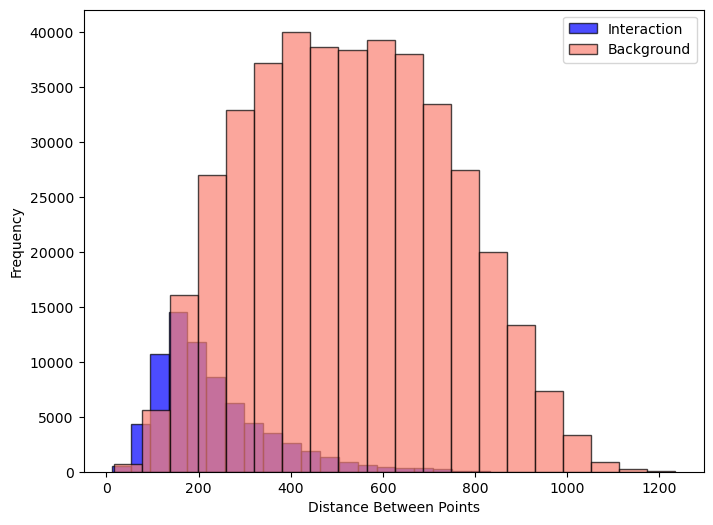

In [5]:
# Concatenate all data frames into one
combined_df = pd.concat(result_dataframes.values())

# Create a figure for the histogram
plt.figure(figsize=(8, 6))

# Plot the histogram for interactions
plt.hist(combined_df[combined_df['Behavior'] == 'interaction']['Distance'], bins=20, edgecolor='black', color='blue', alpha=0.7, label='Interaction')

# Plot the histogram for background behaviors
plt.hist(combined_df[combined_df['Behavior'] == 'Background']['Distance'], bins=20, edgecolor='black', color='salmon', alpha=0.7, label='Background')

# Set labels and title
plt.xlabel('Distance Between Points')
plt.ylabel('Frequency')
plt.title('')
plt.legend()

plt.savefig(r'C:\Users\raulo\Desktop\Faculdade\Mestrado Bioestatística\Tese\Escrita\imagens\histogram_CC4_CC4_min.png')

# Show the plot
plt.show()

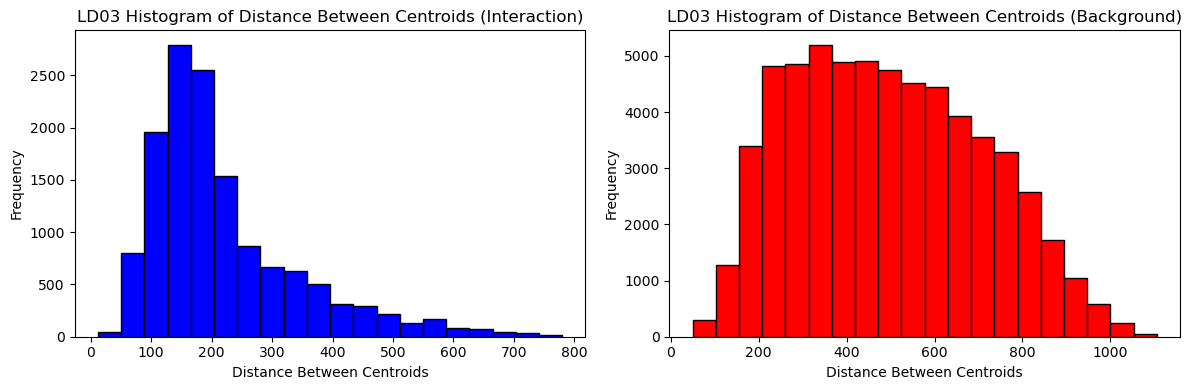

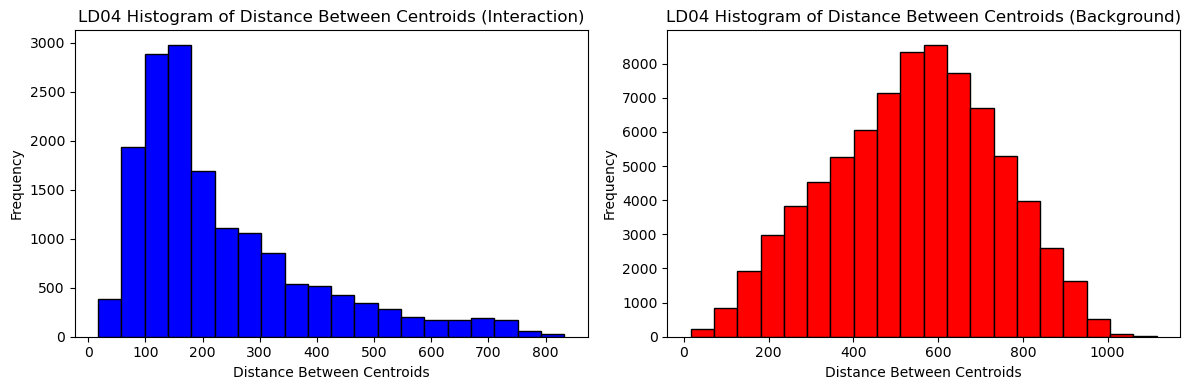

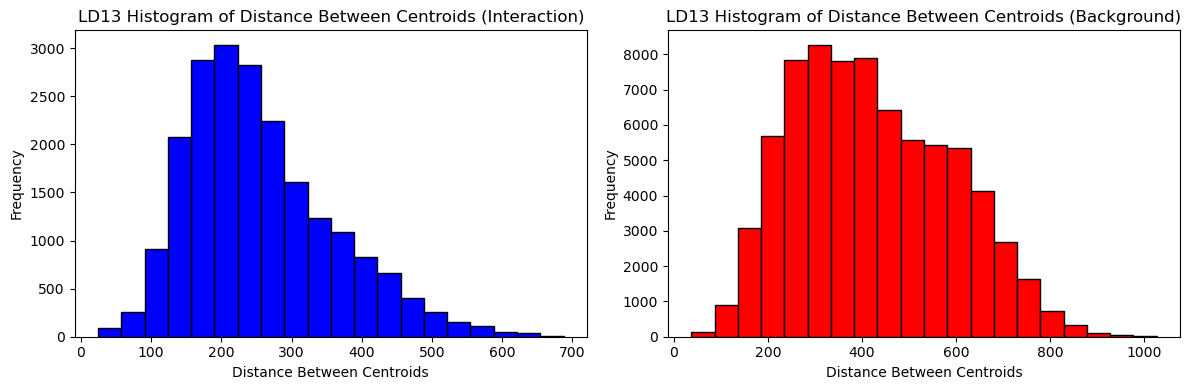

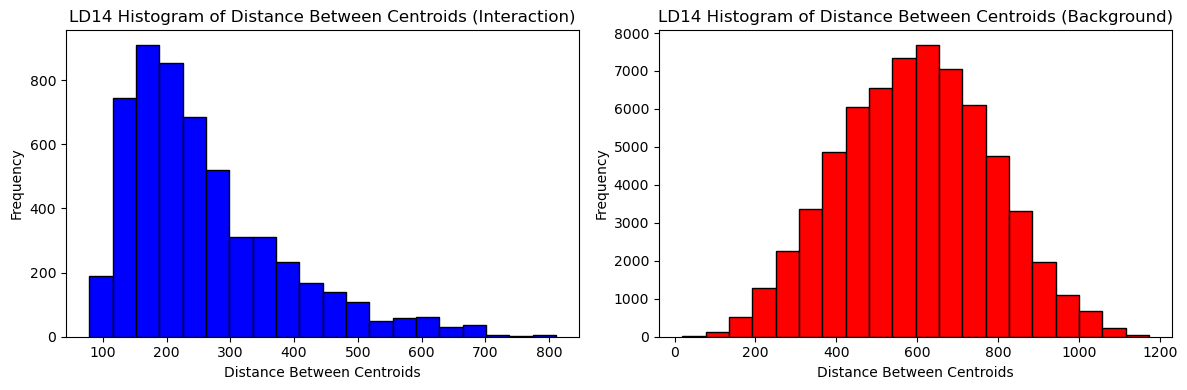

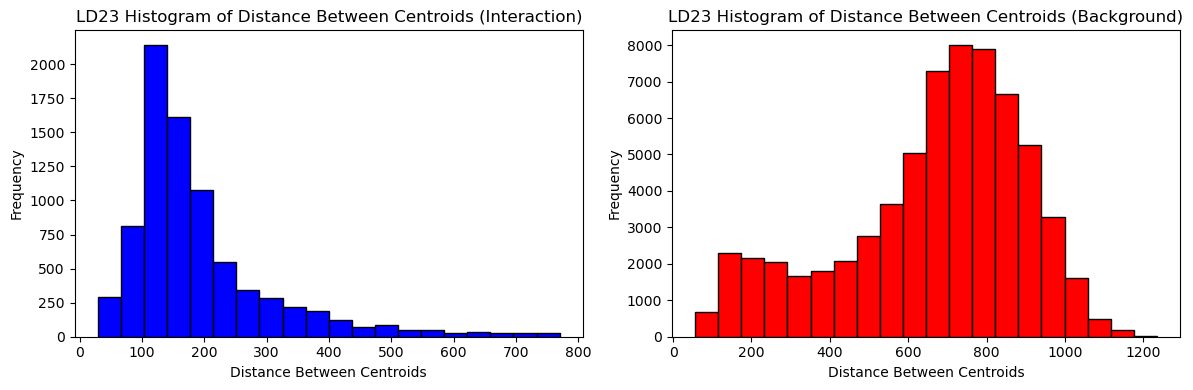

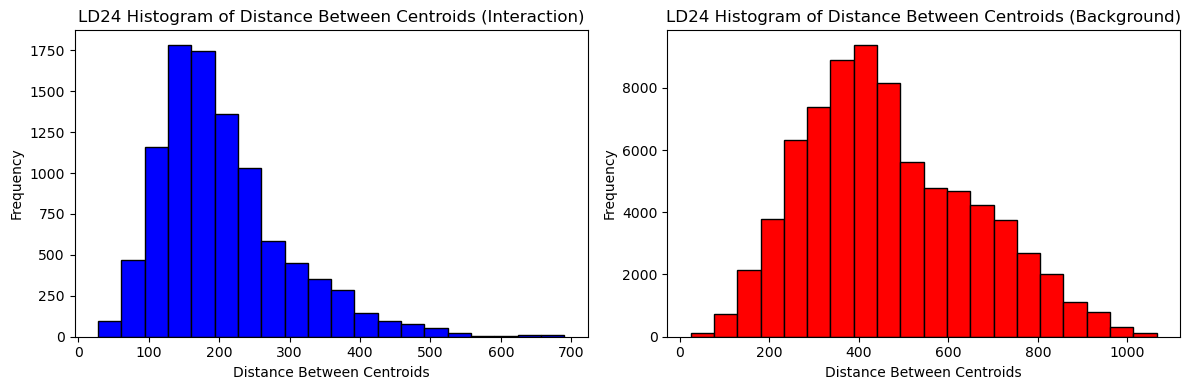

In [4]:
for data_frame in result_dataframes:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the first histogram (interaction)
    ax1.hist(result_dataframes[data_frame][result_dataframes[data_frame]['Behavior'] == 'interaction']['Distance'], bins=20, edgecolor='black', color='blue')
    ax1.set_xlabel('Distance Between Centroids')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'{data_frame} Histogram of Distance Between Centroids (Interaction)')

    # Plot the second histogram (non-interaction)
    ax2.hist(result_dataframes[data_frame][result_dataframes[data_frame]['Behavior'] == 'Background']['Distance'], bins=20, edgecolor='black', color='red')
    ax2.set_xlabel('Distance Between Centroids')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'{data_frame} Histogram of Distance Between Centroids (Background)')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [5]:
for data_frame in result_dataframes:
    print(data_frame, "\n", result_dataframes[data_frame]["Behavior"].value_counts(), "\n")

LD03 
 Background     60336
interaction    13729
posing           368
Name: Behavior, dtype: int64 

LD04 
 Background     78211
interaction    15986
posing           303
Name: Behavior, dtype: int64 

LD13 
 Background     74037
interaction    20744
posing            52
Name: Behavior, dtype: int64 

LD14 
 Background     65346
interaction     5423
posing            61
Name: Behavior, dtype: int64 

LD23 
 Background     64927
interaction     8044
posing           112
Name: Behavior, dtype: int64 

LD24 
 Background     77038
interaction     9741
posing            53
Name: Behavior, dtype: int64 



In [6]:
# Create a dictionary to store summary values for each DataFrame
summary_values = {}

for data_frame in result_dataframes:
    total_frames = 0
    correctly_detected_event = 0
    total = 0
    correctly_frame_count = 0

    interactions = detect_interactions(result_dataframes[data_frame]["Distance"])

    for interaction in interactions:

        start_frame, end_frame = interaction

        if end_frame - start_frame + 1 >= 15:
            total += 1  # Increment the total count for eligible interactions
            total_frames += end_frame - start_frame + 1
            selected_data = result_dataframes[data_frame].loc[start_frame:end_frame, "Behavior"]
            mode_value = stats.mode(selected_data).mode[0]

            if mode_value == "interaction" or mode_value == "TS":
                correctly_detected_event +=1
                correctly_frame_count += end_frame - start_frame + 1

            # Store the prediction in the new column
            result_dataframes[data_frame].loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value
                  
            # Store the summary values in the summary_values dictionary
            summary_values[data_frame] = {
            "total_frames": total_frames,
            "correctly_detected_event": correctly_detected_event,
            "total": total,
            "correctly_frame_count": correctly_frame_count
            }
            
#             if total == 1:
#                 print(f"\nData from: {data_frame}")            
#             print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

C:\Users\raulo\AppData\Local\Temp\ipykernel_4708\3185072338.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(selected_data).mode[0]
C:\Users\raulo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\raulo\AppData\Local\Temp\ipykernel_4708\3185072338.py:20: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see 

In [7]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed


for threshold in threshold_values:
    for min_consecutive in min_consecutive_values:

        summary_values = {}

        for data_frame_name, data_frame in result_dataframes.items():
            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(result_dataframes[data_frame_name]["Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = result_dataframes[data_frame_name].loc[start_frame:end_frame, "Behavior"]
                    #mode_value = stats.mode(selected_data).mode[0]
                    mode_value = selected_data.mode().iloc[0]
                    
                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    result_dataframes[data_frame_name].loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                "total_frames": total_frames,
                "correctly_detected_event": correctly_detected_event,
                "total": total,
                "correctly_frame_count": correctly_frame_count
                })

        #         if total == 1:
        #             print(f"\nData from: {data_frame_name}")
        #         print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

        for data_frame, summary in summary_values.items():
            true_interaction_count = summary['true interaction count']
            total_frames = summary['total_frames']
            correctly_frame_count = summary['correctly_frame_count']
            total_detected_events = summary['total']
            correctly_detected_events = summary['correctly_detected_event']

            accuracy = (correctly_frame_count / total_frames) * 100

            print(f"Data from: {data_frame} with threshold of: {threshold} and min_consecutives of: {min_consecutive}")
            print(f"This data has {true_interaction_count} true events")
            print(f"There were {correctly_frame_count} frames correctly classified, out of a total of {total_frames} frames classified as interaction.")
            print(f"This results in an accuracy of {accuracy:.2f}%.")
            print(f"There were a total of {correctly_detected_events} events detected correctly, out of {total_detected_events} total events detected. ({correctly_detected_events/total_detected_events *100:.2f}%)")
            print(f"There was {correctly_detected_events/true_interaction_count * 100:.2f}% events detected")
            print("")

Data from: LD03 with threshold of: 150 and min_consecutives of: 30
This data has 69 true events
There were 3630 frames correctly classified, out of a total of 4179 frames classified as interaction.
This results in an accuracy of 86.86%.
There were a total of 55 events detected correctly, out of 67 total events detected. (82.09%)
There was 79.71% events detected

Data from: LD04 with threshold of: 150 and min_consecutives of: 30
This data has 63 true events
There were 5126 frames correctly classified, out of a total of 5891 frames classified as interaction.
This results in an accuracy of 87.01%.
There were a total of 68 events detected correctly, out of 83 total events detected. (81.93%)
There was 107.94% events detected

Data from: LD13 with threshold of: 150 and min_consecutives of: 30
This data has 81 true events
There were 1875 frames correctly classified, out of a total of 2152 frames classified as interaction.
This results in an accuracy of 87.13%.
There were a total of 37 events 

Data from: LD03 with threshold of: 175 and min_consecutives of: 45
This data has 69 true events
There were 5052 frames correctly classified, out of a total of 5878 frames classified as interaction.
This results in an accuracy of 85.95%.
There were a total of 53 events detected correctly, out of 65 total events detected. (81.54%)
There was 76.81% events detected

Data from: LD04 with threshold of: 175 and min_consecutives of: 45
This data has 63 true events
There were 6385 frames correctly classified, out of a total of 7158 frames classified as interaction.
This results in an accuracy of 89.20%.
There were a total of 60 events detected correctly, out of 72 total events detected. (83.33%)
There was 95.24% events detected

Data from: LD13 with threshold of: 175 and min_consecutives of: 45
This data has 81 true events
There were 2816 frames correctly classified, out of a total of 3682 frames classified as interaction.
This results in an accuracy of 76.48%.
There were a total of 40 events d

Data from: LD03 with threshold of: 200 and min_consecutives of: 60
This data has 69 true events
There were 6577 frames correctly classified, out of a total of 7802 frames classified as interaction.
This results in an accuracy of 84.30%.
There were a total of 47 events detected correctly, out of 60 total events detected. (78.33%)
There was 68.12% events detected

Data from: LD04 with threshold of: 200 and min_consecutives of: 60
This data has 63 true events
There were 7862 frames correctly classified, out of a total of 8720 frames classified as interaction.
This results in an accuracy of 90.16%.
There were a total of 59 events detected correctly, out of 70 total events detected. (84.29%)
There was 93.65% events detected

Data from: LD13 with threshold of: 200 and min_consecutives of: 60
This data has 81 true events
There were 3811 frames correctly classified, out of a total of 5001 frames classified as interaction.
This results in an accuracy of 76.20%.
There were a total of 40 events d

Data from: LD03 with threshold of: 250 and min_consecutives of: 30
This data has 69 true events
There were 10948 frames correctly classified, out of a total of 16291 frames classified as interaction.
This results in an accuracy of 67.20%.
There were a total of 73 events detected correctly, out of 162 total events detected. (45.06%)
There was 105.80% events detected

Data from: LD04 with threshold of: 250 and min_consecutives of: 30
This data has 63 true events
There were 10892 frames correctly classified, out of a total of 14677 frames classified as interaction.
This results in an accuracy of 74.21%.
There were a total of 80 events detected correctly, out of 144 total events detected. (55.56%)
There was 126.98% events detected

Data from: LD13 with threshold of: 250 and min_consecutives of: 30
This data has 81 true events
There were 11122 frames correctly classified, out of a total of 21080 frames classified as interaction.
This results in an accuracy of 52.76%.
There were a total of 1

In [9]:
interaction_counts = {}  # Create a dictionary to store interaction counts for each DataFrame

for data_frame_name, data_frame in result_dataframes.items():
    # Initialize variables to keep track of the current group
    current_group = None
    interaction_count = 0

    # Iterate through the "Behavior" column
    for behavior in data_frame["Behavior"]:
        if behavior == "interaction":
            if current_group != "interaction":
                # Start of a new interaction group
                interaction_count += 1
                current_group = "interaction"
        else:
            current_group = None  # Reset the group if behavior is not "interaction"

    interaction_counts[data_frame_name] = interaction_count

interaction_counts_60 = {}  # Create a dictionary to store interaction counts for each DataFrame

for data_frame_name, data_frame in result_dataframes.items():
    # Initialize variables to keep track of the current group
    current_group = None
    interaction_count = 0
    current_group_count = 0

    # Iterate through the "Behavior" column
    for behavior in data_frame["Behavior"]:
        if behavior == "interaction":
            if current_group != "interaction":
                # Start of a new interaction group
                current_group_count = 1
                current_group = "interaction"
            else:
                current_group_count += 1
        else:
            if current_group_count >= 45:
                interaction_count += 1
            current_group = None  # Reset the group if behavior is not "interaction"
            current_group_count = 0

    # Check if the last group, if any, was an "interaction" group and met the condition
    if current_group_count > 90:
        interaction_count += 1

    interaction_counts_60[data_frame_name] = interaction_count
    
print("all",interaction_counts)
print("+60",interaction_counts_60)

all {'LD03': 69, 'LD04': 63, 'LD13': 81, 'LD14': 34, 'LD23': 30, 'LD24': 50}
+60 {'LD03': 68, 'LD04': 59, 'LD13': 74, 'LD14': 32, 'LD23': 29, 'LD24': 44}


## Predicetd Events Detected

In [10]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store correctly detected events
    correctly_detected_events = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_events[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_event": correctly_detected_event,
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            correctly_detected_events[threshold][min_consecutive] = correctly_detected_event
    print(f"Data Frame: {data_frame_name}. With a total of: {interaction_count} events")  # Add a header for the data frame
    
    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = correctly_detected_events[threshold][min_consecutive]
            row_values.append(str(cell_value))
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03. With a total of: 69 events
	150	175	200	225	250
30	55	64	71	72	73
45	41	53	57	60	64
60	25	41	47	49	53
------------------------------------------------------------
Data Frame: LD04. With a total of: 63 events
	150	175	200	225	250
30	68	85	84	79	80
45	48	60	73	71	70
60	34	48	59	63	65
------------------------------------------------------------
Data Frame: LD13. With a total of: 81 events
	150	175	200	225	250
30	37	69	87	105	113
45	16	40	68	78	90
60	10	25	40	67	72
------------------------------------------------------------
Data Frame: LD14. With a total of: 34 events
	150	175	200	225	250
30	10	16	21	27	35
45	8	12	15	18	22
60	6	8	11	15	18
------------------------------------------------------------
Data Frame: LD23. With a total of: 30 events
	150	175	200	225	250
30	38	44	42	36	37
45	27	33	33	33	35
60	23	29	29	27	32
------------------------------------------------------------
Data Frame: LD24. With a total of: 50 events
	150	175	200	225	250
30	40	54	53	59	53
45	29	41	45	

In [14]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Define a list to hold the data
excel_data = []

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store correctly detected events
    correctly_detected_events = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_events[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_event": correctly_detected_event,
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            correctly_detected_events[threshold][min_consecutive] = correctly_detected_event
            
            # Append the data to the list
            excel_data.append([data_frame_name.split("_")[0], min_consecutive, threshold, correctly_detected_event])

# Create a DataFrame from the collected data
df = pd.DataFrame(excel_data, columns=['ID', 'Min_frames', 'Max_distance', 'Correct_Event'])

# Save the DataFrame to an Excel file
#df.to_excel(r'C:\Users\raulo\Desktop\Nova pasta\output.xlsx', index=False)

## Number of wrong Events wrongly detected

In [15]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    print(f"Data Frame: {data_frame_name}")  # Add a header for the data frame

    # Initialize a nested dictionary to store correctly detected events
    correctly_detected_events = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_events[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0
            wrongly_detected_event = 0
            wrongly_detected_frames = 0

            interactions = detect_interactions(data_frame["Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1
                        
                    else:
                        wrongly_detected_event += 1
                        wrongly_detected_frames += end_frame - start_frame + 1
                        
                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_event": correctly_detected_event,
                    "total_detected_events": total,
                    "correctly_frame_count": correctly_frame_count,
                    "wrongly_detected_event": wrongly_detected_event,
                    "wrongly_detected_frames": wrongly_detected_frames
                })

            correctly_detected_events[threshold][min_consecutive] = summary_values[data_frame_name]["wrongly_detected_event"]  # Calculate and store the ratio

    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = correctly_detected_events[threshold][min_consecutive]
            row_values.append(f"{cell_value}")  # Format as percentage
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03
	150	175	200	225	250
30	12	18	37	63	89
45	5	12	18	33	47
60	2	7	13	19	28
------------------------------------------------------------
Data Frame: LD04
	150	175	200	225	250
30	15	24	33	44	64
45	9	12	18	26	38
60	4	7	11	15	21
------------------------------------------------------------
Data Frame: LD13
	150	175	200	225	250
30	6	34	78	122	160
45	2	13	32	65	109
60	2	6	14	32	62
------------------------------------------------------------
Data Frame: LD14
	150	175	200	225	250
30	2	1	2	7	18
45	0	1	1	1	4
60	0	0	0	1	1
------------------------------------------------------------
Data Frame: LD23
	150	175	200	225	250
30	16	21	24	22	28
45	11	18	20	19	21
60	8	14	16	15	16
------------------------------------------------------------
Data Frame: LD24
	150	175	200	225	250
30	12	28	50	82	111
45	1	10	25	38	59
60	1	4	8	19	37
------------------------------------------------------------


## Number of correct frames

In [16]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store correctly detected frames
    correctly_detected_frames = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_frames[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_frames_count = 0  # Updated variable name
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_frames_count += end_frame - start_frame + 1  # Updated variable name

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_frames_count": correctly_detected_frames_count,  # Updated variable name
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            correctly_detected_frames[threshold][min_consecutive] = correctly_detected_frames_count  # Updated variable name
    print(f"Data Frame: {data_frame_name}. With a total of: {data_frame['Behavior'].value_counts().get('interaction', 0)} frames")  # Add a header for the data frame

    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = correctly_detected_frames[threshold][min_consecutive]  # Updated variable name
            row_values.append(str(cell_value))
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03. With a total of: 13729 frames
	150	175	200	225	250
30	3630	5491	7603	9486	10948
45	3087	5052	7090	9035	10633
60	2264	4433	6577	8491	10057
------------------------------------------------------------
Data Frame: LD04. With a total of: 15986 frames
	150	175	200	225	250
30	5126	7344	8998	10036	10892
45	4413	6385	8605	9750	10531
60	3686	5767	7862	9317	10269
------------------------------------------------------------
Data Frame: LD13. With a total of: 20744 frames
	150	175	200	225	250
30	1875	3847	5973	8790	11122
45	1114	2816	5271	7779	10295
60	813	2077	3811	7191	9353
------------------------------------------------------------
Data Frame: LD14. With a total of: 5423 frames
	150	175	200	225	250
30	653	1267	1922	2483	3107
45	572	1126	1715	2149	2630
60	472	909	1515	1991	2428
------------------------------------------------------------
Data Frame: LD23. With a total of: 8044 frames
	150	175	200	225	250
30	3160	4499	5561	6294	6809
45	2776	4100	5214	6181	6737
60	2563	3887	5008

## Number of wrong frames predicted

In [17]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store incorrectly detected frames
    incorrectly_detected_frames = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        incorrectly_detected_frames[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_frames_count = 0
            incorrectly_detected_frames_count = 0  # Updated variable name
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_frames_count += end_frame - start_frame + 1
                    else:
                        incorrectly_detected_frames_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_frames_count": correctly_detected_frames_count,
                    "incorrectly_detected_frames_count": incorrectly_detected_frames_count,  # Updated variable name
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            incorrectly_detected_frames[threshold][min_consecutive] = incorrectly_detected_frames_count  # Updated variable name
    print(f"Data Frame: {data_frame_name}. With a total of: {data_frame['Behavior'].value_counts().get('interaction', 0)} frames")  # Add a header for the data frame

    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = incorrectly_detected_frames[threshold][min_consecutive]  # Updated variable name
            row_values.append(str(cell_value))
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03. With a total of: 13729 frames
	150	175	200	225	250
30	549	1029	2149	3694	5343
45	285	826	1486	2593	3822
60	135	561	1225	1893	2833
------------------------------------------------------------
Data Frame: LD04. With a total of: 15986 frames
	150	175	200	225	250
30	765	1210	1748	2601	3785
45	540	773	1202	1953	2872
60	266	517	858	1397	2000
------------------------------------------------------------
Data Frame: LD13. With a total of: 20744 frames
	150	175	200	225	250
30	277	1613	3743	6535	9958
45	133	866	2077	4414	8084
60	133	520	1190	2737	5662
------------------------------------------------------------
Data Frame: LD14. With a total of: 5423 frames
	150	175	200	225	250
30	78	51	90	265	725
45	0	51	59	66	217
60	0	0	0	66	70
------------------------------------------------------------
Data Frame: LD23. With a total of: 8044 frames
	150	175	200	225	250
30	1312	2420	3393	3885	4785
45	1139	2294	3239	3774	4531
60	974	2079	3033	3561	4279
-----------------------------------------

#### Creates a dict with predicted | true labels for all dataframes with all param combinations

In [18]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [150, 175, 200, 225, 250]
min_consecutive_values = [30, 45, 60]

# Initialize a dictionary to store results for each combination
results_dict = {}

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary for the current data frame
    data_frame_results = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        for min_consecutive in min_consecutive_values:
            interactions = detect_interactions(data_frame["Distance"], min_consecutive, threshold)

            # Initialize an empty DataFrame to store "Behavior" and "Interaction_Predictions" columns
            selected_data = pd.DataFrame(columns=["Behavior", "Interaction_Predictions"])
            selected_data["Behavior"] = data_frame["Behavior"]
            selected_data["Interaction_Predictions"] = "background"

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    selected_data.loc[start_frame:end_frame, "Interaction_Predictions"] = "interaction"

            # Store the selected data in the data frame results
            data_frame_results[(threshold, min_consecutive)] = selected_data

    # Store the data frame results in the overall results dictionary
    results_dict[data_frame_name] = data_frame_results

In [19]:
# Specify the folder where you want to save the CSV files
output_folder = r"C:\Users\raulo\Desktop\ze_vids\phase_3\results_dataframes\CleanerCentroid_ClientCentroi_4points"

# Save the results to CSV files
for data_frame_name, data_frame_results in results_dict.items():
    for (threshold, min_consecutive), selected_data in data_frame_results.items():
        # Generate a filename based on the data frame name, threshold, and min_consecutive values
        filename = f"{data_frame_name}_threshold{threshold}_minc{min_consecutive}.csv"

        # Create the full path by joining the output folder and filename
        full_path = os.path.join(output_folder, filename)

        # Save the selected data to CSV
        selected_data.to_csv(full_path, index=False)

In [18]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Define a list to hold the data
excel_data = []

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store correctly and incorrectly detected events and frames
    correctly_detected_events = {}
    correctly_detected_frames = {}
    incorrectly_detected_events = {}
    incorrectly_detected_frames = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_events[threshold] = {}  # Initialize inner dictionary for correctly detected events
        correctly_detected_frames[threshold] = {}  # Initialize inner dictionary for correctly detected frames
        incorrectly_detected_events[threshold] = {}  # Initialize inner dictionary for incorrectly detected events
        incorrectly_detected_frames[threshold] = {}  # Initialize inner dictionary for incorrectly detected frames
        
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_frames_count = 0
            incorrectly_detected_frames_count = 0
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_frames_count += end_frame - start_frame + 1
                    else:
                        incorrectly_detected_frames_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_frames_count": correctly_detected_frames_count,
                    "incorrectly_detected_frames_count": incorrectly_detected_frames_count,
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            correctly_detected_frames[threshold][min_consecutive] = correctly_detected_frames_count
            incorrectly_detected_frames[threshold][min_consecutive] = incorrectly_detected_frames_count
            correctly_detected_events[threshold][min_consecutive] = interaction_count

            # Append the data to the list
            excel_data.append([data_frame_name.split("_")[0], min_consecutive, threshold, interaction_count, correctly_detected_frames_count, incorrectly_detected_frames_count])

# Create a DataFrame from the collected data
df = pd.DataFrame(excel_data, columns=['ID', 'Min_frames', 'Max_distance', 'True_Interaction_Count', 'Correctly_Detected_Frames', 'Incorrectly_Detected_Frames'])

# Save the DataFrame to an Excel file
df.to_excel(r'C:\Users\raulo\Desktop\Nova pasta\output.xlsx', index=False)